## Maximal Sphere inscribed into a polytope : Linear Programing Problem



* Module: Mathematics for Machine Learning and Optimization - ***M. JANAQI***
* Student: ***Lucas TEXIER***

In [45]:
# whole imports
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### By setting x=[x1, x2, x3], the problem can be expressed with 5 inequations such that :

c = [x1, x2] and r = [ x3 ] 

aTc + r * norm2(a) <= b 

with a = [a1, ..., a5] and b = [b1,..., b5]

### Question 1: solve (linprog), (primal) (dual) to get x*, y*

In [28]:
#PRIMAL 

# Objective function
f = [0, 0, -1] # c = (x1, x2) & r = x3

#Set the matrix constants
a1 = [1, 1, np.sqrt(2)]
b1 = 5

a2 = [-1, 2, np.sqrt(5)]
b2 = 4

a3 = [2, -1, np.sqrt(5)]
b3 = 6

a4 = [-1, 0, 1]
b4 = 0

a5 = [0, -1, 1]
b5 = 0

A = [a1, a2, a3, a4, a5]
b = [b1, b2, b3, b4, b5]

#resolve with the linprog library
res = linprog(f, A_ub=A, b_ub=b)

c_star = res.x[:2]
r_star = -res.fun

print("Coordonate of the center, c* is equal to : ", c_star)
print("Optimized radius, r* is equal to :", r_star)

Coordonate of the center, c* is equal to :  [1.73278162 1.35332616]
Optimized radius, r* is equal to : 1.3533261631164006


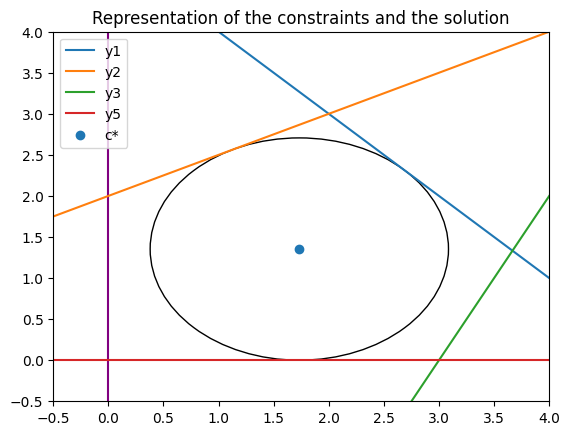

In [58]:
x = np.linspace(-0.5, 4, 400)

# Compute the equations y_i for each constraint
y1 = (b1 - a1[0]*x) / a1[1]
y2 = (b2 - a2[0]*x) / a2[1]
y3 = (b3 - a3[0]*x) / a3[1]
# y4 = (b4 - a4[0]*x) / a4[1]
# y4 is a vertical line so we plot it separately to do not have a division by 0
plt.axvline(0, color='purple')
y5 = (b5 - a5[0]*x) / a5[1]



# Plot each equations
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.plot(x, y5, label='y5')

# Plot the circle and the center
center = plt.scatter(c_star[0], c_star[1], label='c*')
circle = plt.Circle(c_star, r_star, fill = False)
plt.gca().add_patch(circle)


plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)
plt.title('Representation of the constraints and the solution')
plt.legend()

* y4 constraint equation corresponds to the purple line.

In [33]:
# DUAL

#with the solver linprog, the -y* is given
res.ineqlin.marginals
y_star = -res.ineqlin.marginals

print('y* is equal to :', y_star)

y* is equal to : [0.15036957 0.15036957 0.         0.         0.45110872]


### Question 2 : calculate the gap

In [38]:
#Compute the gap :

# (a) first method :
solver_gap = res.mip_gap
print('The solver gives the gap: ', solver_gap)

# (b) second method more mechanical :

# define of f0 with x = (c[0], c[1], r)
def f0(x):
    return x[2]

# define of h with y = (y1, y2, y3, y4, y5)
def h(y):
    return b @ y

#def gap function
def gap(x, y):
    return f0(x) - h(y)

#results of question 1 : y_star, r_star, c_star are found
#let's construct x_star
x_star = [c_star[0], c_star[1], r_star]

#compute the gap
res_gap = gap(x_star, y_star)

print('For (x*, y*), gap function returns', res_gap)

The solver gives the gap:  0.0
For (x*, y*), gap function returns 3.311640051073539e-08


* Compute the gap proofs the certificate of optimality in our case.

### Question 3: Verify Complementary Slackness Condition 

* The goal is to show that for 1<= k <= 5, y_k * (B_k * x - b_k) = 0

In [44]:
A = np.array(A)  # Convert A to numpy array
x_star = np.array(x_star)  # Convert x_star to numpy array

second_term = [A[i] @ x_star - b[i] for i in range(len(b))]
multiplication = [y_star[i] * second_term[i] for i in range(len(b))]

multiplication_table = {'y_k *': y_star, 'B_k*x - b_k': second_term, 'multiplication': multiplication}

multiplication_dataframe = pd.DataFrame(multiplication_table)

# Show the table
multiplication_dataframe.head()

,y_k *,B_k*x - b_k,multiplication
0,0.150370,0.000000,0.0
1,0.150370,0.000000,0.0
2,0.000000,-0.861634,-0.0
3,0.000000,-0.379455,-0.0
4,0.451109,0.000000,0.0


* The table  shows the Complementary Slackness Condition the multiplication is always equal to 0.

### Conclusion

To conclude, we have solved a linear programming problem by formulating the problem with a set of inequalities and found the optimal solution using the primal-dual method.
The figure drawn in question 2 clearly illustrates the aim of the problem, which was to optimise the length of the radius of the circle by considering the constraints.